<a href="https://colab.research.google.com/github/micahks/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Micah_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
import numpy as np

sales = [2505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_mean = np.sum(sales)/len(sales)
sales_var = np.sum((sales-sales_mean)**2/len(sales))
sales_std = (sales_var)**(1/2)

print('mean=', sales_mean)
print('variance=',sales_var)
print('std=',sales_std)

#check

print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

mean= 2909.8571428571427
variance= 176985.5510204082
std= 420.696507021877
2909.8571428571427
176985.5510204082
420.696507021877


In [ ]:
A = np.matrix([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(A)

3

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
import pandas as pd

customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({"sales": sales, "customers": customers})

df

,sales,customers
0,2505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [ ]:
df.cov()

# different values from the variance above because the ddof=1. I couldn't figure out how to change the ddof with panadas cov() function.

,sales,customers
sales,206483.142857,3866.261905
customers,3866.261905,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
sales_var1 = np.sum((sales-sales_mean)**2/(len(sales)-1))
sales_std1 = (sales_var1)**(1/2)

cust_mean = np.sum(customers)/len(customers)
cust_var = np.sum((customers-cust_mean)**2/(len(customers)-1))
cust_std = (cust_var)**(1/2)

print('sales variance(ddof=1)=', sales_var1)
print('sales std(ddof=1)=', sales_std1)

print('customers variance(ddof=1)=', cust_var)
print('customers std(ddof=1)=', cust_std)

sales variance(ddof=1)= 206483.14285714287
sales std(ddof=1)= 454.4041624557844
customers variance(ddof=1)= 290.95238095238096
customers std(ddof=1)= 17.057326313123664


In [ ]:
df.cov()/(cust_std*sales_std1)

# I dived the entire covariance matrix by the std of customers and sales 
#and I got the correct correlation coefficient between sales and customers.
# However, the two tables don't look the same because sales vs sales cell will
# need to be divided by sales_std*sales_std, which I don't want to do because 
# the correlation coefficient will be 1 anyway because your comparing sales vs sales. 

,sales,customers
sales,26.639824,0.498813
customers,0.498813,0.037538


In [ ]:
df.corr()

,sales,customers
sales,1.000000,0.498813
customers,0.498813,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
df_tit = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df_tit.head(5)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [ ]:
df_tit_num = df_tit.drop(columns = ['Unnamed: 0','pclass', 'survived', 'name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest', 'has_cabin_number'])

df_tit_num.head()

,age,sibsp,parch,fare,body
0,29.0000,0.0,0.0,211.3375,NaN
1,0.9167,1.0,2.0,151.5500,NaN
2,2.0000,1.0,2.0,151.5500,NaN
3,30.0000,1.0,2.0,151.5500,135.0
4,25.0000,1.0,2.0,151.5500,NaN


In [ ]:
df_tit_num.cov()

,age,sibsp,parch,fare,body
age,165.850021,-2.559806,-1.459378,114.416613,81.622922
sibsp,-2.559806,1.085052,0.336833,8.641768,-8.708471
parch,-1.459378,0.336833,0.749195,9.928031,4.237190
fare,114.416613,8.641768,9.928031,2678.959738,-179.164684
body,81.622922,-8.708471,4.237190,-179.164684,9544.688567


In [ ]:
df_tit_num.corr()

,age,sibsp,parch,fare,body
age,1.000000,-0.190747,-0.130872,0.171892,0.059059
sibsp,-0.190747,1.000000,0.373587,0.160238,-0.099961
parch,-0.130872,0.373587,1.000000,0.221539,0.051099
fare,0.171892,0.160238,0.221539,1.000000,-0.043110
body,0.059059,-0.099961,0.051099,-0.043110,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


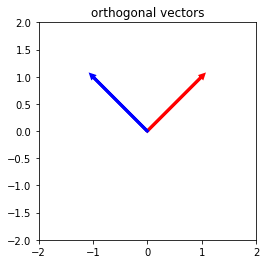

In [ ]:
import matplotlib.pyplot as plt

# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-2,2)

# vectors
a = [1,1]
b = [-1,1]

# Fix Axes
plt.axes().set_aspect('equal')

# Plot Vectors
plt.arrow(0, 0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("orthogonal vectors")
plt.show()

Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)

-40

These are not orthogonal because the dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = [2,-15,6,20]

c_norm = np.linalg.norm(c)
c_norm**2

665.0

In [ ]:
cdotc = np.dot(c,c)
cdotc

665

In [ ]:
C = np.array([c])

C

array([[  2, -15,   6,  20]])

In [ ]:
C.T*C

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}= 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
f = [4,12,11,9,2]

f_unit = f/np.linalg.norm(f)

f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


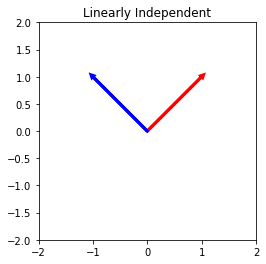

In [ ]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-2,2)

# vectors
a = [1,1]
b = [-1,1]

# Fix Axes
plt.axes().set_aspect('equal')

# Plot Vectors
plt.arrow(0, 0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("Linearly Independent")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


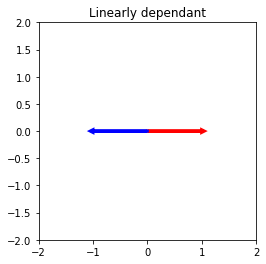

In [ ]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-2,2)

# vectors
a = [1,0]
b = [-1,0]

# Fix Axes
plt.axes().set_aspect('equal')

# Plot Vectors
plt.arrow(0, 0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("Linearly dependant")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Vectors g and h span the $\mathbb{R}$ space only, because the vectors are linearly dependant.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


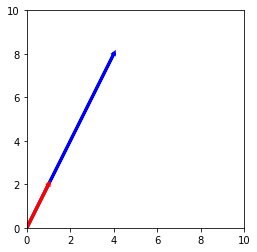

In [ ]:
# Axis Bounds
plt.xlim(-0,10)          
plt.ylim(0,10)

# vectors
a = [1,2]
b = [4,8]

# Fix Axes
plt.axes().set_aspect('equal')

# Plot Vectors

plt.arrow(0, 0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]



Using gausian Elimination you get \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
So these vectors span $\mathbb{R}^3$

See work below

\begin{bmatrix}
1 & 2 & 3\\
-1 & 0 & 7\\
4 & 8 & 2
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 3\\
0 & 2 & 10\\
4 & 8 & 2
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 3\\
0 & 2 & 10\\
0 & 0 & -10
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 3\\
0 & 2 & 10\\
0 & 0 & -1
\end{bmatrix}

At this point I know this can be reduce to row echelon form without and vectors linearly dependant.


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


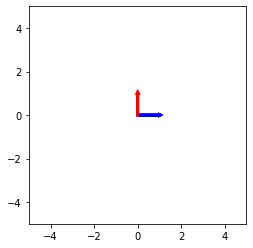

In [ ]:
# Axis Bounds
plt.xlim(-5,5)          
plt.ylim(-5,5)

# vectors
a = [0,1]
b = [1,0]

# Fix Axes
plt.axes().set_aspect('equal')

# Plot Vectors

plt.arrow(0, 0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

## 6.2 What does it mean to form a basis?

basis is a span of vectors that are linear independent such that that can spand the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

As shown in converting the matrix to row echelon form. The rank of this matrix is 3 because there are no non zero rows and non of the vectors are linearly dependant.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
v = np.array([1,3])
w = np.array([-1,2])

projlw = (np.dot(v,w)/np.dot(v,v))*v

projlw

array([0.5, 1.5])

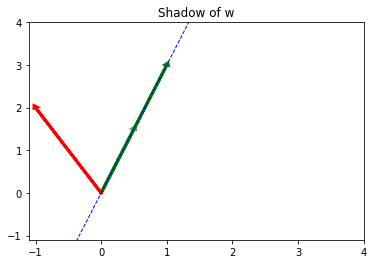

In [ ]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = projlw

# Plot Vectors and L
plt.plot([-1, 2], [-3, 6], '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

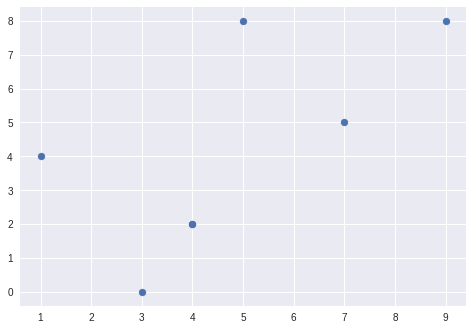

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()